# llama.cpp部署推理qwen3-8b

## 安装llama.cpp
```bash
git clone https://github.com/ggml-org/llama.cpp
cd llama.cpp
cmake -B build
cmake --build build --config Release

```


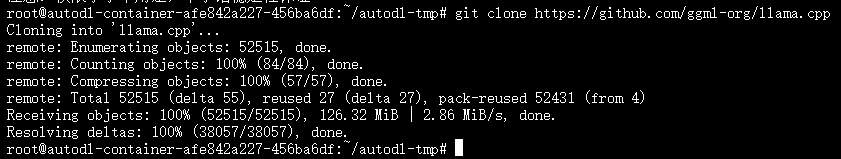

# 准备 GGUF 文件

如果需要自行准备 GGUF 文件，可以使用 `convert-hf-to-gguf.py` 脚本将 Hugging Face Hub 上的模型文件转换为 GGUF 格式：

```bash
# git clone https://github.com/ggml-org/llama.cpp
cd llama.cpp
python convert_hf_to_gguf.py /root/autodl-tmp/Qwen3-8B --outfile /root/autodl-tmp/qwen3-8b-f16.gguf
```
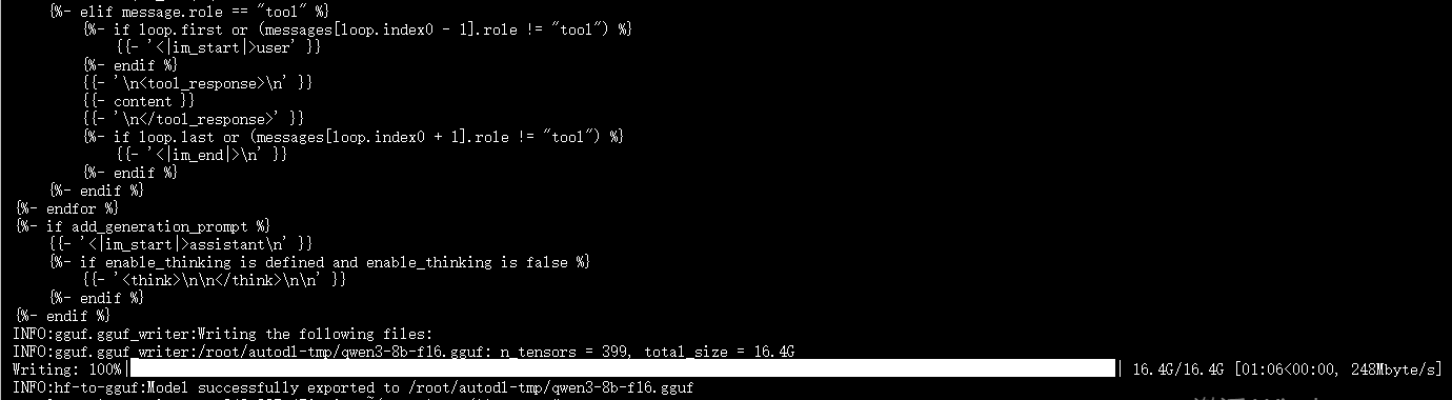

## 使用 `llama-cli`

`llama-cli` 是一个命令行工具，可用于与模型进行交互。运行以下命令：

```bash
./llama-cli -m /root/autodl-tmp/qwen3-8b-f16.gguf --jinja --color -ngl 99 -fa -sm row --temp 0.6 --top-k 20 --top-p 0.95 --min-p 0 -c 40960 -n 32768 --no-context-shift
```
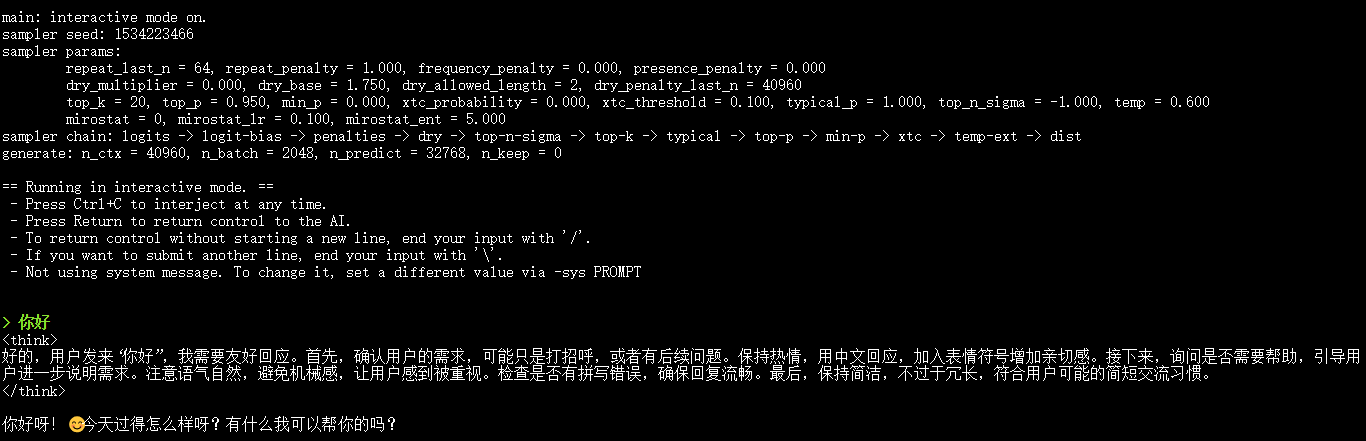

## 使用 `llama-server`

`llama-server` 是一个简单的 HTTP 服务器，提供了一组 LLM REST API 和一个简单的 Web 前端，用于与模型进行交互。运行以下命令：

```bash
./llama-server -m /root/autodl-tmp/qwen3-8b-f16.gguf --jinja --reasoning-format deepseek -ngl 99 -fa -sm row --temp 0.6 --top-k 20 --top-p 0.95 --min-p 0 -c 40960 -n 32768 --no-context-shift
```
默认情况下，服务器监听 `http://localhost:8080`，您可以通过浏览器访问 `http://localhost:8080/` 使用 Web 前端，或通过 `http://localhost:8080/v1/` 使用 OpenAI 兼容的 API。
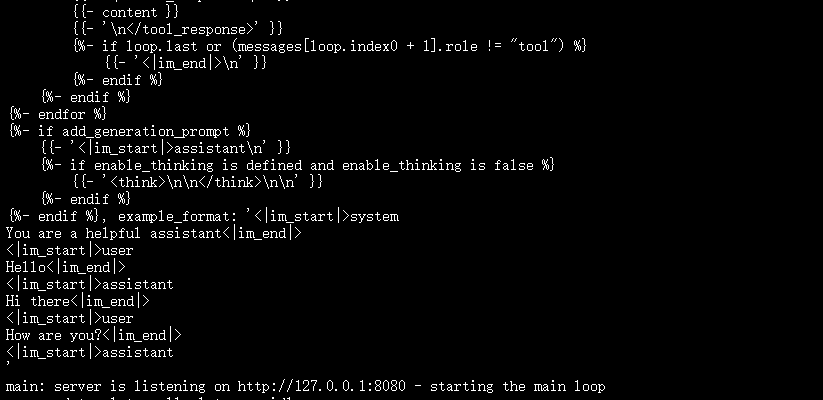


In [1]:
import openai

client = openai.OpenAI(
    base_url="http://localhost:8080/v1", # "http://<Your api-server IP>:port"
    api_key = "sk-no-key-required"
)

completion = client.chat.completions.create(
    model="qwen",
    messages=[
        {"role": "user", "content": "你是谁？"}
    ]
)
print(completion.choices[0].message.content)

我是通义千问，是通义实验室研发的超大规模语言模型，属于通义千问系列。我的设计目标是提供帮助和解决问题，能够回答问题、创作文字、编程、逻辑推理等。我支持多种语言，包括中文和英文，并且覆盖了广泛的领域。如果你有任何问题或需要帮助，欢迎随时告诉我！
